In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')

In [24]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Dataset Overview

1. Load and inspect the data:
  * What are the dimensions of the dataset?
  * What are the column names, and what data types do they have?

2. Check for missing values:
  * Which columns have missing values?
  * How many missing values does each column have?

3. Summary statistics:
  * What are the mean, median, min, and max of numerical columns like age and fare?

In [4]:
df.shape

(891, 15)

In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [12]:
df[['age','fare']].describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Univariate Analysis

4. Distribution of age:
  * What is the distribution of the age column?
  * Are there any outliers?

5. Gender analysis:
  * What is the distribution of the sex column?
  * Which gender had a higher survival rate?

<Axes: xlabel='age', ylabel='Density'>

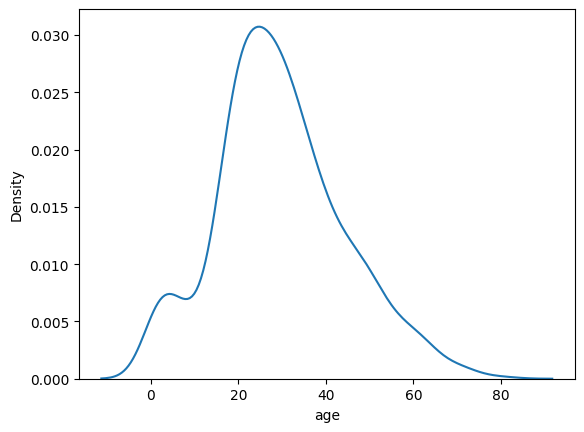

In [15]:
sns.kdeplot(df['age'])

<Axes: ylabel='age'>

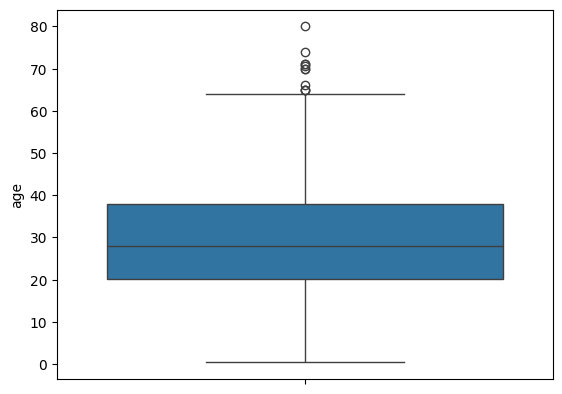

In [13]:
sns.boxplot(df['age'])

<Axes: xlabel='count', ylabel='sex'>

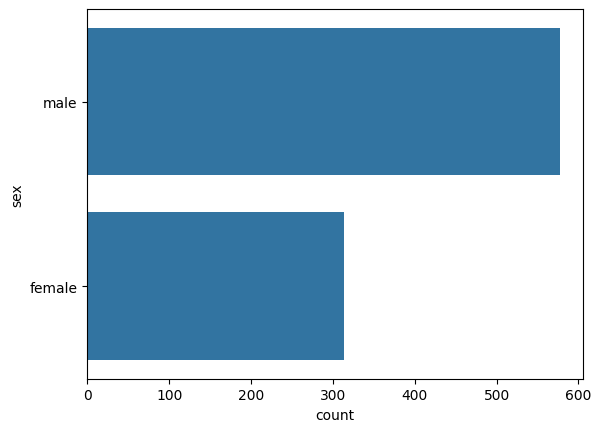

In [18]:
sns.countplot(df['sex'])

In [20]:
df.groupby('sex')['survived'].mean()

,survived
sex,
female,0.742038
male,0.188908


<Axes: xlabel='sex'>

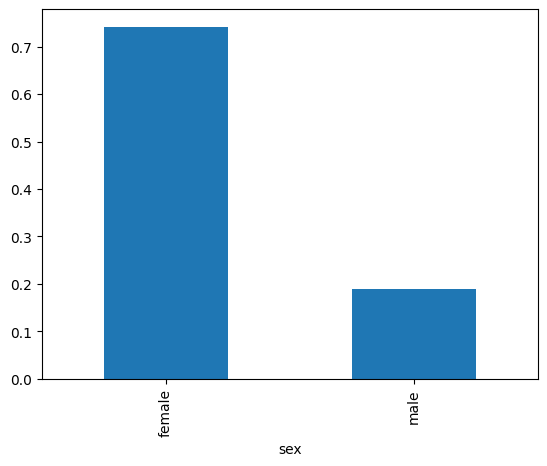

In [21]:
df.groupby('sex')['survived'].mean().plot(kind='bar')

### Bivariate Analysis
6. Class vs. Fare:
  * How does the fare vary across different classes (pclass)?
  * Are there noticeable differences in fare by class?

7. Age and Survival:
  * What is the survival rate for different age groups?
  * Does age affect survival?

8. Embarked and Survival:
  * Which port had the highest survival rate?

In [22]:
df.groupby('pclass')['fare'].mean()

,fare
pclass,
1,84.154687
2,20.662183
3,13.675550


In [28]:
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Elderly']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

age_group_survival = df.groupby('age_group')['survived'].mean()

age_group_survival

<ipython-input-28-8d21f3f45421>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('age_group')['survived'].mean()


,survived
age_group,
Child,0.579710
Teen,0.428571
Young Adult,0.382682
Adult,0.400000
Elderly,0.227273


<Axes: xlabel='age_group'>

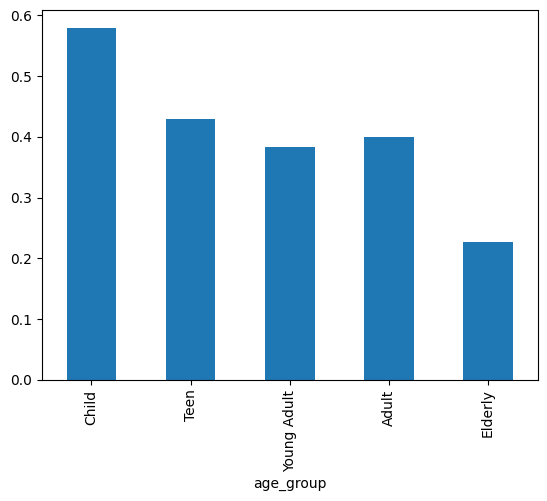

In [29]:
age_group_survival.plot(kind='bar')

In [26]:
df.groupby('embarked')['survived'].count()

,survived
embarked,
C,168
Q,77
S,644


<Axes: xlabel='embarked'>

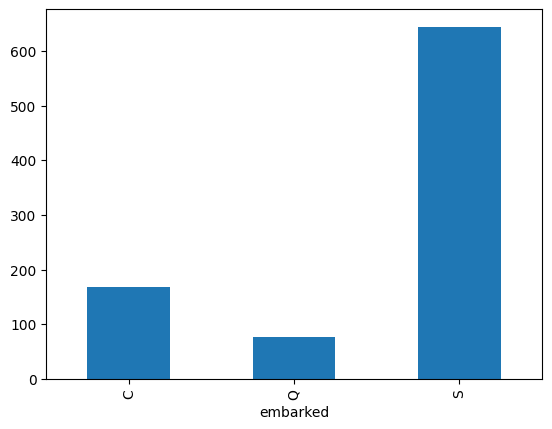

In [27]:
df.groupby('embarked')['survived'].count().plot(kind='bar')

### Multivariate Analysis
9. Class, Gender, and Survival:
  * How do gender and class together influence survival rates?

10. Correlation Matrix:
  * Compute and visualize a correlation matrix for the dataset.
  * Which variables are most strongly correlated?

In [32]:
df.groupby(['pclass', 'sex'])['survived'].mean()

pclass  sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

In [37]:
df.select_dtypes(include='number').corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

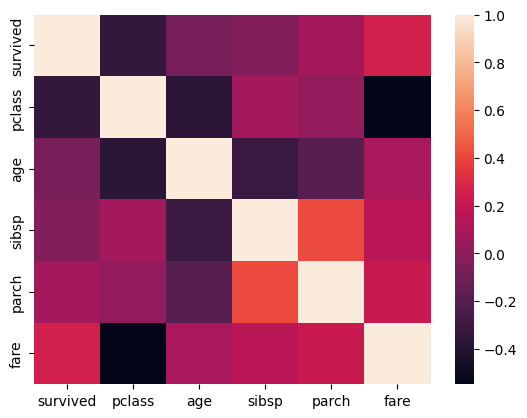

In [36]:
sns.heatmap( df.select_dtypes(include='number').corr())

### Additional Steps
11. Feature Engineering:
  * Create a new column, family_size, that is the sum of sibsp and parch.
  * Analyze the impact of family_size on survival rate.

In [39]:
df['family_size'] = df['sibsp'] + df['parch']

In [40]:
df.groupby('family_size')['survived'].mean()

,survived
family_size,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000
